In [1]:
%cd "/home/victor-cimat/tesis/YOLO/yolov5"
import torch
import utils
display = utils.notebook_init()  # checks
%cd "/home/victor-cimat/tesis/YOLO"

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
YOLOv5 🚀 v6.2-183-gc98128f Python-3.8.10 torch-1.12.1+cu102 CPU


Setup complete ✅ (12 CPUs, 125.4 GB RAM, 94.9/937.3 GB disk)
/home/victor-cimat/tesis/YOLO


In [2]:
print('torch %s %s' % (torch.__version__, 
                       torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.12.1+cu102 CPU


In [3]:
torch.cuda.is_available()

False

In [12]:
torch.cuda.device_count()

1

In [4]:
# Dir a código de entrenamiemto en yolov5
detect = "/home/victor-cimat/tesis/YOLO/yolov5/detect.py" 
# Dir a datos yaml descargados de Roboflow
imagen = "/home/victor-cimat/tesis/YOLO/prueba_img/prueba_img_1.jpg"
# Carpeta donde guardaremos resultados
output = "/home/victor-cimat/tesis/YOLO/infer_img/"
pesos = "/home/victor-cimat/tesis/YOLO/outtrain/weights/best.pt"

In [30]:
!python3 $detect --weights $pesos --img 832 --source $imagen --augment --name $output


detect: weights=['/home/victor-cimat/tesis/YOLO/outtrain/weights/best.pt'], source=/home/victor-cimat/tesis/YOLO/prueba_img/prueba_img_1.jpg, data=yolov5/data/coco128.yaml, imgsz=[832, 832], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=yolov5/runs/detect, name=/home/victor-cimat/tesis/YOLO/infer_img/, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
YOLOv5 🚀 v6.2-183-gc

In [1]:
import torch

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('/home/victor-cimat/tesis/YOLO/yolov5/', 'custom', path='/home/victor-cimat/tesis/YOLO/outtrain/weights/best.pt', source='local') 


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
YOLOv5 🚀 v6.2-183-gc98128f Python-3.8.10 torch-1.12.1+cu102 CPU

Fusing layers... 
YOLOv5x summary: 322 layers, 86193601 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

%matplotlib inline

In [387]:
imagen = "/home/victor-cimat/tesis/YOLO/prueba_img/prueba_img_8.jpg"

In [388]:
results = model(imagen, augment=True)

In [389]:
img = cv2.imread(imagen,0)

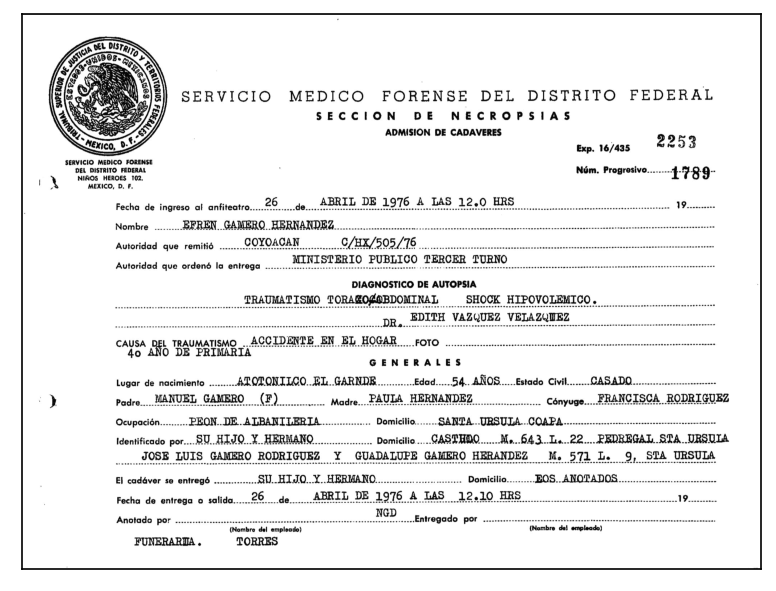

In [390]:
fig = plt.figure(dpi=150)
plt.imshow(img,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.savefig('/home/victor-cimat/tesis/YOLO/prueba_doc.jpg',dpi=200)
plt.show()

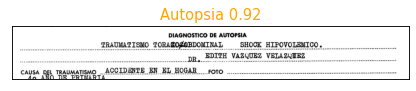

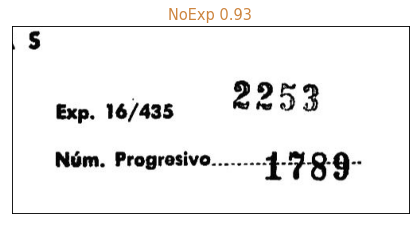

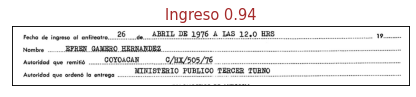

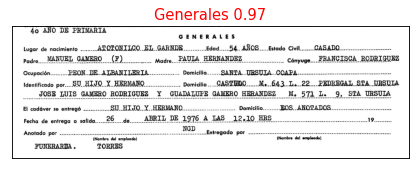

In [391]:
colores = ['orange','peru','brown','red']
i = 0
recortes = []
for imgCrop in results.crop(save=False):
    if imgCrop['conf'] > 0.7:
        recortes.append(imgCrop['im'])
        fig = plt.figure( dpi=80)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imgCrop['im'],cmap='gray')
        plt.title(imgCrop['label'],color=colores[i])
        plt.savefig('/home/victor-cimat/tesis/YOLO/prueba'+imgCrop['label'].replace('0.','').replace(' ', '_')+'.jpg',dpi=200)
        plt.show()
        i += 1

In [392]:
import tensorflow as tf

In [393]:
new_model = tf.keras.models.load_model('/home/victor-cimat/tesis/DeepEraser/deep-erase-main/saved_model/my_model')

In [11]:
new_model.summary()

Model: "DeepErase"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Mi_generador (Functional)   (None, 64, 256, 1)        8047857   
                                                                 
 Mi_discriminator (Functiona  (None, 8, 32, 1)         11167297  
 l)                                                              
                                                                 
Total params: 19,215,154
Trainable params: 19,175,218
Non-trainable params: 39,936
_________________________________________________________________


In [394]:
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)

In [345]:
refine_net = load_refinenet_model()
craft_net = load_craftnet_model()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


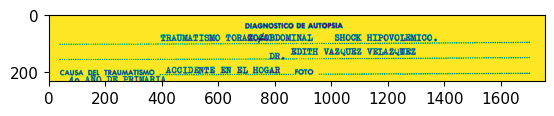

In [420]:
plt.imshow(cv2.cvtColor(recortes[0], cv2.COLOR_BGR2GRAY))

In [404]:
img_binary=np.array(np.where(cv2.cvtColor(recortes[1], cv2.COLOR_BGR2GRAY)>200, 255, 10), dtype=np.uint8)

In [399]:
prediction_result = get_prediction(
    image=img_binary,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.8,
    link_threshold=0.9,
    low_text=0.3,
    cuda=False,
    long_size=4000
)

In [405]:
prediction_result = get_prediction(
    image=img_binary,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.5,
    link_threshold=0.2,
    low_text=0.1,
    cuda=False,
    long_size=2000
)

In [406]:
recortes_dir = '/home/victor-cimat/tesis/YOLO/output/image_crops/'
!rm -r $recortes_dir

In [407]:
palabras = export_detected_regions(
    image=img_binary,
    regions=prediction_result["boxes"])

In [408]:
for img in palabras:
    imagen = cv2.imread(img,0)
    imagen[imagen==0]=255
    imagen[imagen==10]=0
    cv2.imwrite('/home/victor-cimat/tesis/YOLO/'+img,imagen)

In [409]:
import cv2
import os
from glob import glob
from numpy.random import choice, normal, rand, randint, uniform

In [411]:
img = palabras[4]

In [412]:
input_im = tf.io.read_file(img)
input_im = tf.image.decode_jpeg(input_im, channels=1)
input_im = tf.image.resize(input_im, (64,256))
input_im = tf.image.convert_image_dtype(input_im, tf.float32) / 255.
input_im = tf.data.Dataset.from_tensors(input_im[None,:,:,:])

In [413]:
pred = new_model.predict(input_im)

1/1 [==============================] - 1s 500ms/step


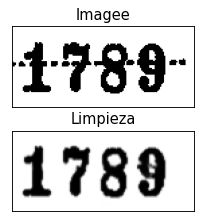

In [414]:
imagen = cv2.imread(img,0)
img_pred =  cv2.resize(pred[0][:,:,0],(cv2.imread(img,0).shape[1],cv2.imread(img,0).shape[0]), interpolation = cv2.INTER_AREA)
fig = plt.figure(figsize=(10, 3), dpi=80)
gs = fig.add_gridspec(2, hspace=0.3)
axs = gs.subplots(sharex=True, sharey=True)
axs[0].imshow(imagen,cmap='gray')
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[0].set_title('Imagee')
axs[1].imshow(img_pred,cmap='gray')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[1].set_title('Limpieza')
plt.savefig("Deep_Erase_p1.png",dpi=80)

In [415]:
import pytesseract
from PIL import Image

In [416]:
#custom_config = r'--psm 6 --oem 3 -c tessedit_char_whitelist=0123456789'
pytesseract.image_to_string(imagen, lang='spa', config=custom_config)

'1789\n\x0c'

In [417]:
img_pred[img_pred<=0.5] = 0
img_pred[img_pred>=0.5] = 255
img_pred = np.array(img_pred, dtype=np.uint8)

In [418]:
pytesseract.image_to_string(img_pred, lang='spa', config=custom_config)

'1789\n\x0c'

In [419]:
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img_binary, lang='spa', config=custom_config)

'h Ss\nExp. 16/435 22 53\nNúm. Progrosivo.........f-41-9-6).-\n\x0c'